<a href="https://colab.research.google.com/github/kabil3399/machine-learning-algo/blob/main/Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv  SVM_Assignment14

**Import libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Importing the dataset**

In [ ]:
df= pd.read_csv('Social_Network_Ads.csv')
x=df.iloc[:,[2, 3]].values
y= df.iloc[:, 4].values
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

**Fitting SVM to the Training set**

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

**Predicting the Test set results**

In [ ]:
y_pred = classifier.predict(x_test)

**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

**Visualising the Training set results**

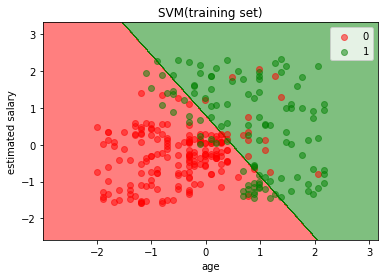

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:,0].max()+1,step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5 , cmap= ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1], alpha=0.5,
              c= ListedColormap(('red','green'))(i), label= j)
plt.title("SVM(training set)")
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

**Visualising the Test set results**

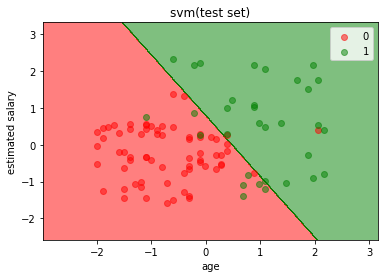

In [ ]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:,0].max()+1,step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.5 , cmap= ListedColormap(('red','green')))
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1], alpha=0.5,
              c= ListedColormap(('red','green'))(i), label= j)
plt.title("svm(test set)")
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()